In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
def plot_success_rate(config1_file, config2_file):
    # Read the CSV files for each configuration
    config1_data = pd.read_csv(config1_file)
    config2_data = pd.read_csv(config2_file)

    # Get the success rates for each configuration
    config1_reinforce_found = config1_data["Reinforce Found"]
    config1_parallel_sweep_found = config1_data["Greedy Found"]
    config2_reinforce_found = config2_data["Reinforce Found"]
    config2_parallel_sweep_found = config2_data["Greedy Found"]

    # Calculate success rates for each configuration
    config1_reinforce_success_rate = config1_reinforce_found.mean() * 100
    config1_parallel_sweep_success_rate = config1_parallel_sweep_found.mean() * 100
    config2_reinforce_success_rate = config2_reinforce_found.mean() * 100
    config2_parallel_sweep_success_rate = config2_parallel_sweep_found.mean() * 100

    # Create a horizontal bar plot for success rates
    configurations = ["Configuration 1", "Configuration 2"]
    reinforce_success_rates = [
        config1_reinforce_success_rate,
        config2_reinforce_success_rate,
    ]
    parallel_sweep_success_rates = [
        config1_parallel_sweep_success_rate,
        config2_parallel_sweep_success_rate,
    ]
    colors_reinforce = ["blue"] * len(configurations)
    colors_parallel_sweep = ["red"] * len(configurations)

    bar_width = 0.15
    plt.figure(figsize=(10, 6))
    index = np.arange(len(configurations))

    bars_reinforce = plt.barh(
        index,
        reinforce_success_rates,
        bar_width,
        color=colors_reinforce,
        label="Reinforce",
    )
    bars_parallel_sweep = plt.barh(
        index + bar_width,
        parallel_sweep_success_rates,
        bar_width,
        color=colors_parallel_sweep,
        label="Parallel Sweep",
    )

    # Add value labels to the bars
    for bar in bars_reinforce:
        width = bar.get_width()
        plt.text(
            width,
            bar.get_y() + bar.get_height() / 2,
            f"{width:.1f}%",
            ha="left",
            va="center",
            fontweight="bold",
            color="black",
        )
    for bar in bars_parallel_sweep:
        width = bar.get_width()
        plt.text(
            width,
            bar.get_y() + bar.get_height() / 2,
            f"{width:.1f}%",
            ha="left",
            va="center",
            fontweight="bold",
            color="black",
        )

    # Set y-axis ticks and labels
    plt.yticks(index + bar_width / 2, configurations)
    plt.ylabel("Configuration")

    # Set x-axis label and title
    plt.xlabel("Success Rate (%)")
    plt.title("Success Rate Comparison between Configurations")
    # Set the x-axis limits
    plt.xlim(
        0, max(max(reinforce_success_rates), max(parallel_sweep_success_rates)) * 1.1
    )

    # Add legend
    plt.legend()

    plt.show()

In [3]:
DATA_DIR = 'data_new/'
plot_success_rate(f"{DATA_DIR}results_20_4_1_new.csv", f"{DATA_DIR}results_20_4_5_new.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'data_new/results_20_4_1_new.csv'

In [16]:
import matplotlib.patches as mpl_patches


def plot_histogram(csv_file):
    # Read the CSV file
    data = pd.read_csv(csv_file)

    # Extract the required columns for each algorithm
    reinforce_steps = data["Reinforce Steps"]
    greedy_steps = data["Greedy Steps"]
    print(reinforce_steps.describe())
    print(greedy_steps.describe())

    # Box plot for Steps with median values
    plt.figure(figsize=(12, 12))
    sns.histplot(data=[reinforce_steps, greedy_steps], bins=50, palette="Set1")
    plt.xlabel("Steps")
    plt.ylabel("Frequency")
    plt.title("Comparison of Steps between Reinforce and Greedy")
    # plt.xticks([0, 1], ['Reinforce', 'Greedy'])
    plt.show()


def plot_boxplot(csv_file, out_path):
    # Read the CSV file
    data = pd.read_csv(csv_file)

    # Extract the required columns for each algorithm
    reinforce_steps = data["Reinforce Steps"]
    greedy_steps = data["Greedy Steps"]
    print("Greedy mean: ", greedy_steps.mean())
    print("Reinforce mean: ", reinforce_steps.mean())

    # Box plot for Steps with median values
    plt.figure(figsize=(10, 6))
    sns.set_theme(style="darkgrid")
    sns.boxplot(
        data=[reinforce_steps, greedy_steps],
        showfliers=True,
        medianprops={"color": "black"},
        palette="Set1",
    )
    plt.xlabel("Algorithm")
    plt.ylabel("Steps")
    plt.title("Comparison of Steps between Reinforce and Greedy")
    plt.xticks([0, 1], ["Reinforce", "Greedy"])

    # Add median value as text
    median_reinforce = reinforce_steps.median()
    median_greedy = greedy_steps.median()
    mean_reinforce = round(reinforce_steps.mean(), 2)
    mean_greedy = round(greedy_steps.mean(), 2)
    # create the corresponding number of labels (= the text you want to display)
    labels = []
    labels.append(f"Reinforce\nMedian: {median_reinforce}\nMean: {mean_reinforce}")
    labels.append(f"Greedy\nMedian: {median_greedy}\nMean: {mean_greedy}")
    # create a list with two empty handles (or more if needed)
    handles = [
        mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white", lw=0, alpha=0)
    ] * len(labels)

    # create the legend, supressing the blank space of the empty line symbol and the
    # padding between symbol and label by setting handlelenght and handletextpad
    plt.legend(
        handles,
        labels,
        loc="best",
        fontsize="medium",
        fancybox=True,
        framealpha=0.7,
        handlelength=0,
        handletextpad=0,
    )
    plt.savefig(out_path, dpi=300, bbox_inches="tight")
    plt.show()

Greedy mean:  11.8302
Reinforce mean:  13.562


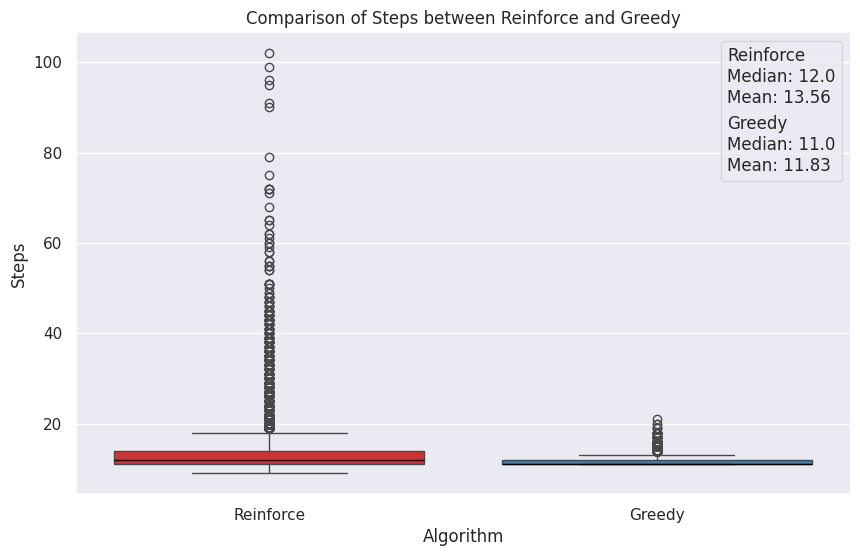

In [17]:
filename = "data/results_20_4_1_new.csv"
plot_boxplot(filename, "imgs/boxplot_20_4_1.png")

Greedy mean:  16.8856
Reinforce mean:  18.4577


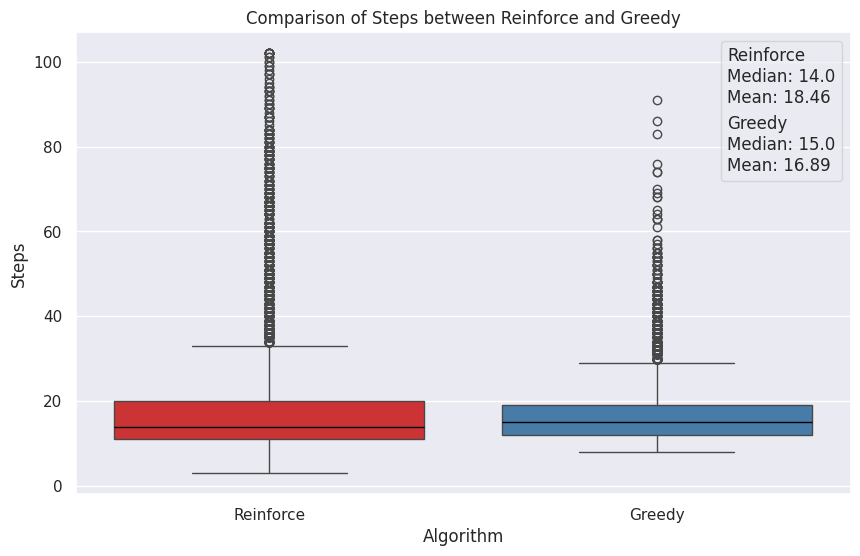

In [18]:
filename = "data/results_20_4_5_new.csv"
plot_boxplot(filename, "imgs/boxplot_20_4_5.png")